# Mini Project: Image Blur with Matrix Convolution
### Overview
This mini project demonstrates how to:
    1) Represent a grayscale image as a 2D NumPy array (matrix).


    2) Define a 3×3 blur kernel (average filter).


    3) Apply the kernel using manual convolution (sliding window).


    4) Visualize the original and blurred images using Matplotlib.


This is a simple introduction to how convolution works in computer vision and deep learning (e.g., CNNs).

### Requirements


In [2]:
pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Code: image_blur_convolution.py

Original image (5x5):
[[ 10.  20.  30.  40.  50.]
 [ 60.  70.  80.  90. 100.]
 [110. 120. 130. 140. 150.]
 [160. 170. 180. 190. 200.]
 [210. 220. 230. 240. 250.]]
Shape: (5, 5)

Blur kernel (3x3):
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
Shape: (3, 3)

Blurred image (3x3):
[[ 70.  80.  90.]
 [120. 130. 140.]
 [170. 180. 190.]]
Shape: (3, 3)


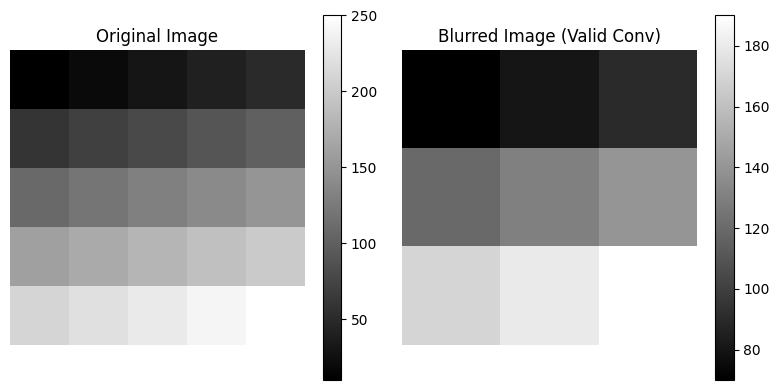

In [3]:
"""
Mini Project: Image Blur with Matrix Convolution

Description
-----------
This script treats a small 5x5 grayscale "image" as a matrix and applies
a 3x3 blur kernel using manual convolution. It then visualizes the
original and blurred images side by side using Matplotlib.

Concepts:
- Image as a 2D matrix (NumPy array)
- Kernel / filter (3x3 average blur)
- Convolution (sliding window: elementwise multiply + sum)
- Visualization with plt.imshow
"""

import numpy as np
import matplotlib.pyplot as plt


def create_test_image() -> np.ndarray:
    """
    Create a simple 5x5 grayscale test image.

    Returns
    -------
    img : np.ndarray
        A 5x5 array of pixel intensities.
    """
    img = np.array([
        [10,  20,  30,  40,  50],
        [60,  70,  80,  90, 100],
        [110, 120, 130, 140, 150],
        [160, 170, 180, 190, 200],
        [210, 220, 230, 240, 250]
    ], dtype=float)
    return img


def create_blur_kernel(size: int = 3) -> np.ndarray:
    """
    Create a simple average blur kernel of given size.

    Parameters
    ----------
    size : int, optional
        Size of the (size x size) kernel. Default is 3.

    Returns
    -------
    kernel : np.ndarray
        A (size x size) blur kernel where all values are 1/(size*size).
    """
    kernel = np.ones((size, size), dtype=float) / (size * size)
    return kernel


def conv2d_valid(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Apply a 2D 'valid' convolution (no padding, stride 1).

    For an image of shape (H, W) and a kernel of shape (kH, kW),
    the output shape will be (H - kH + 1, W - kW + 1).

    Parameters
    ----------
    image : np.ndarray
        2D input array representing the image.
    kernel : np.ndarray
        2D kernel/filter to convolve with the image.

    Returns
    -------
    output : np.ndarray
        2D array containing the convolution result.
    """
    H, W = image.shape
    kH, kW = kernel.shape

    out_h = H - kH + 1
    out_w = W - kW + 1

    if out_h <= 0 or out_w <= 0:
        raise ValueError("Kernel size must be smaller than or equal to image size.")

    output = np.zeros((out_h, out_w), dtype=float)

    # Slide the kernel over the image
    for i in range(out_h):
        for j in range(out_w):
            patch = image[i:i + kH, j:j + kW]
            output[i, j] = np.sum(patch * kernel)

    return output


def plot_images(original: np.ndarray, blurred: np.ndarray) -> None:
    """
    Plot the original and blurred images side by side.

    Parameters
    ----------
    original : np.ndarray
        Original image (2D array).
    blurred : np.ndarray
        Blurred image (2D array).
    """
    plt.figure(figsize=(8, 4))

    # Left: original image
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original Image")
    plt.colorbar()
    plt.axis("off")

    # Right: blurred image
    plt.subplot(1, 2, 2)
    plt.imshow(blurred, cmap="gray")
    plt.title("Blurred Image (Valid Conv)")
    plt.colorbar()
    plt.axis("off")

    plt.tight_layout()
    plt.show()


def main() -> None:
    """
    Main entry point for the mini project.

    Steps:
    1. Create a 5x5 test image.
    2. Create a 3x3 blur kernel (average filter).
    3. Apply valid convolution (no padding) to get a 3x3 blurred image.
    4. Print numeric arrays and plot them.
    """
    # 1. Create image
    img = create_test_image()
    print("Original image (5x5):")
    print(img)
    print("Shape:", img.shape)

    # 2. Create blur kernel
    kernel = create_blur_kernel(size=3)
    print("\nBlur kernel (3x3):")
    print(kernel)
    print("Shape:", kernel.shape)

    # 3. Apply convolution (valid)
    blurred = conv2d_valid(img, kernel)
    print("\nBlurred image (3x3):")
    print(blurred)
    print("Shape:", blurred.shape)

    # 4. Plot results
    plot_images(img, blurred)


if __name__ == "__main__":
    main()
